<a href="https://colab.research.google.com/github/prathameshsasane/SQL-Data-Analysis-and-Visualization-Projects/blob/master/happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('RdYlGn_r')
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols

In [ ]:
from google.colab import drive

# mount the Google drive as a path that you can work on 
drive.mount('/drive')

Mounted at /drive


In [ ]:
df = pd.read_csv("/drive//My Drive/Colab Notebooks/app/world-happiness-report-2021.csv")

In [ ]:
df

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [ ]:
df.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


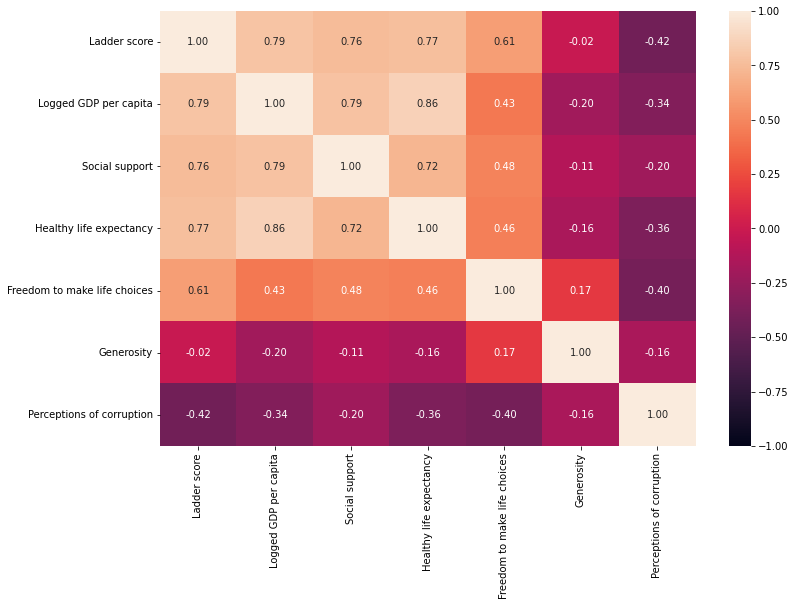

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

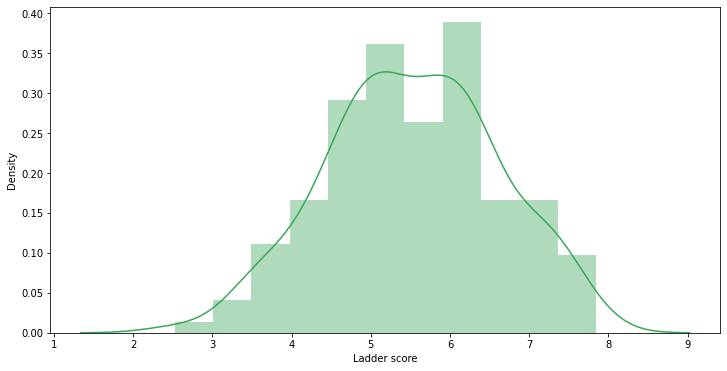

In [ ]:

plt.figure(figsize=(12, 6))
sns.distplot(df["Ladder score"],kde=True,hist=True)

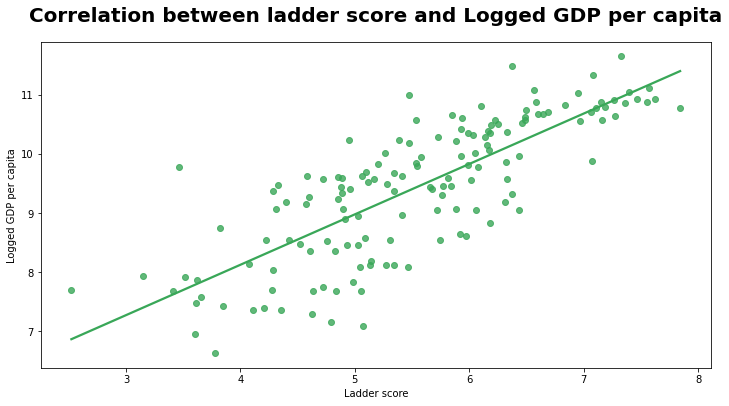

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Ladder score', y='Logged GDP per capita', data=df, ci=None);
plt.title('Correlation between ladder score and Logged GDP per capita', fontsize=20, fontweight='bold', pad=20);

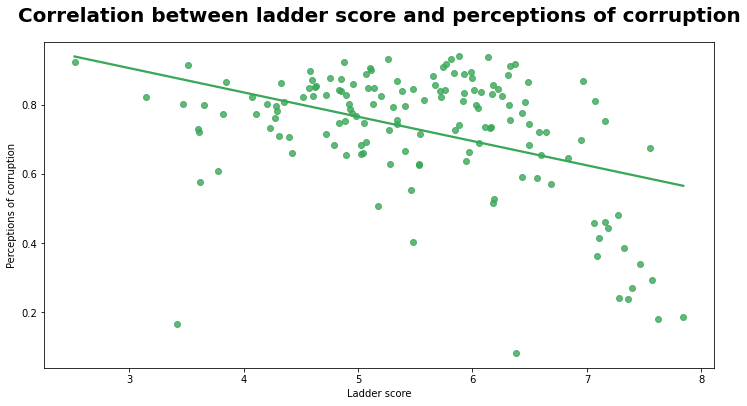

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Ladder score', y='Perceptions of corruption', data=df, ci=None);
plt.title('Correlation between ladder score and perceptions of corruption', fontsize=20, fontweight='bold', pad=20);


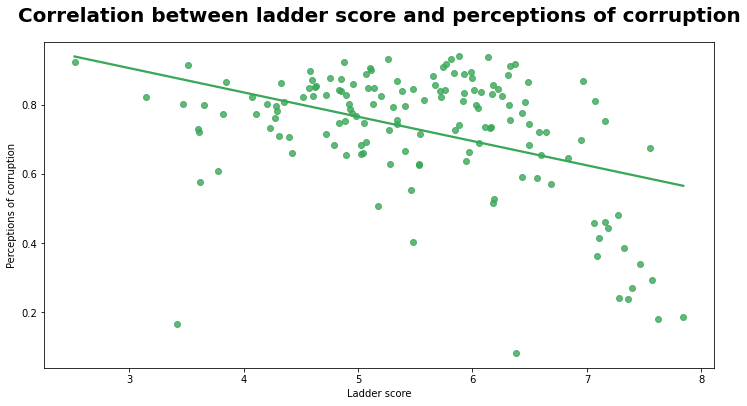

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Ladder score', y='Perceptions of corruption', data=df, ci=None);
plt.title('Correlation between ladder score and perceptions of corruption', fontsize=20, fontweight='bold', pad=20);


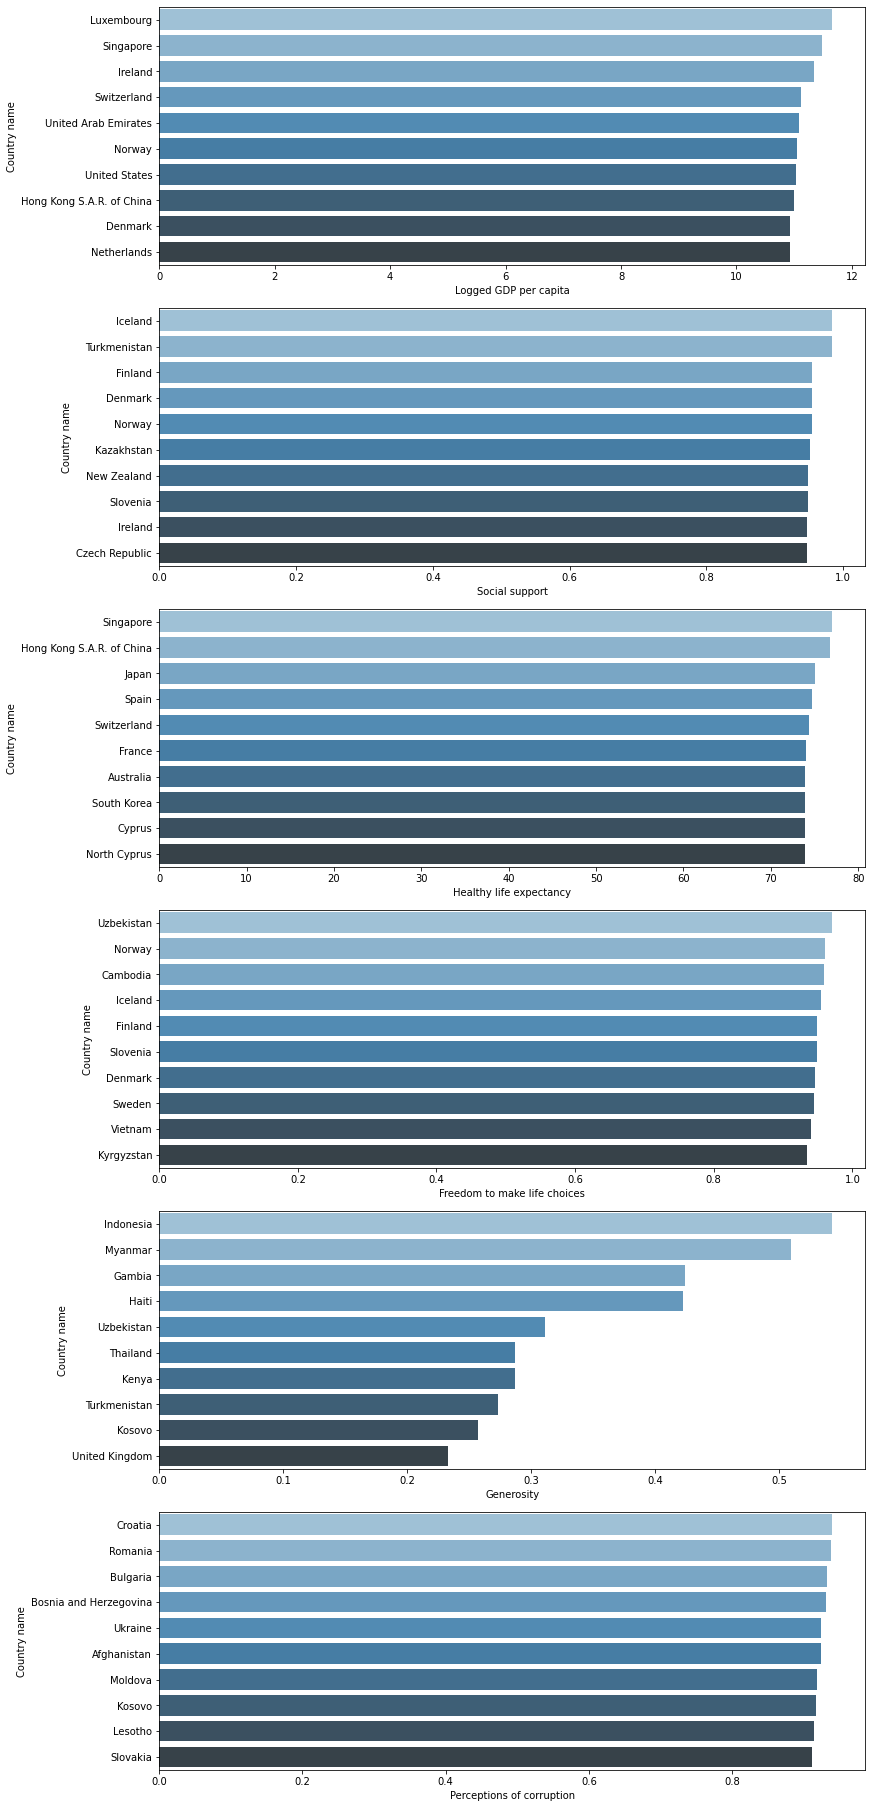

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=1,constrained_layout=True,figsize=(12,25))

sns.barplot(x='Logged GDP per capita',y='Country name',data=df.nlargest(10,'Logged GDP per capita'),ax=axes[0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country name',data=df.nlargest(10,'Social support'),ax=axes[1],palette="Blues_d")

sns.barplot(x='Healthy life expectancy' ,y='Country name',data=df.nlargest(10,'Healthy life expectancy'),ax=axes[2],palette="Blues_d")

sns.barplot(x='Freedom to make life choices' ,y='Country name',data=df.nlargest(10,'Freedom to make life choices'),ax=axes[3],palette="Blues_d")

sns.barplot(x='Generosity' ,y='Country name',data=df.nlargest(10,'Generosity'),ax=axes[4],palette="Blues_d")

sns.barplot(x='Perceptions of corruption' ,y='Country name',data=df.nlargest(10,'Perceptions of corruption'),ax=axes[5],palette="Blues_d")

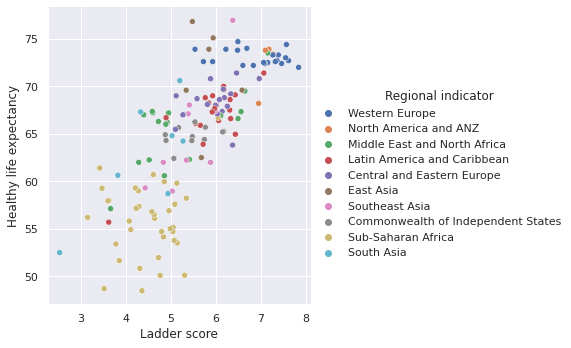

In [ ]:
sns.set_theme()

sns.relplot(
    data=df,
    x='Ladder score', 
    y='Healthy life expectancy', 
    hue='Regional indicator')

In [ ]:
x = df [['Logged GDP per capita',	'Social support',	'Healthy life expectancy','Freedom to make life choices',	'Generosity',	'Perceptions of corruption']]
y = df['Ladder score']
lm = ols('y~ x', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     73.27
Date:                Tue, 17 May 2022   Prob (F-statistic):           5.06e-41
Time:                        22:04:26   Log-Likelihood:                -116.50
No. Observations:                 149   AIC:                             247.0
Df Residuals:                     142   BIC:                             268.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2372      0.630     -3.548      0.001      -3.484      -0.991
x[0]           0.2795      0.087      3.219      0.002       0.108       0.451
x[1]           2.4762      0.668      3.706      0.000       1.155       3.797
x[2]           0.0303      0.013      2.274      0.024       0.004       0.057
x[3]           2.0105      0.495      4.063      0.000       1.032       2.989
x[4]           0.3644      0.321      1.134      0.259      -0.271       0.999
x[5]          -0.6051      0.291     -2.083      0.039      -1.179      -0.031
==============================================================================
Omnibus:                       12.908   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.688
Skew:                          -0.667   Prob(JB):                      0.00107
Kurtosis:                       3.650   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
data_region=df['Regional indicator'].value_counts()
data_rvalues=data_region.values
data_rregion=data_region.index

In [ ]:
df['Regional indicator']

0          Western Europe
1          Western Europe
2          Western Europe
3          Western Europe
4          Western Europe
              ...        
144    Sub-Saharan Africa
145    Sub-Saharan Africa
146    Sub-Saharan Africa
147    Sub-Saharan Africa
148            South Asia
Name: Regional indicator, Length: 149, dtype: object

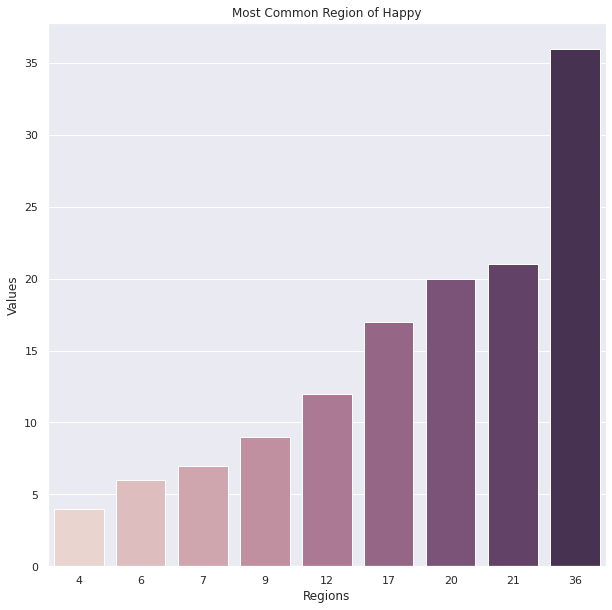

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.barplot(x=data_region,y=data_rvalues,palette=sns.cubehelix_palette(len(data_rregion)))
plt.xlabel('Regions')
plt.ylabel('Values')

plt.title('Most Common Region of Happy')
plt.show()